In [17]:
from train import Train
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.spatial import distance_matrix
from collections import namedtuple
import torch
import random
from env import state2tens
from lib import is_state_final, total_distance

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
State = namedtuple('State', ('W', 'coords', 'partial_solution'))


In [18]:
# Graph
NR_NODES = 10  # Number of nodes in graph
EMBEDDING_DIMENSIONS = 5  # Embedding dimension D
EMBEDDING_ITERATIONS_T = 1  # Number of embedding iterations T

# Learning
NR_EPISODES = 6000
MEMORY_CAPACITY = 10000
N_STEP_QL = 2  # Number of steps (n) in n-step Q-learning to wait before computing target reward estimate
BATCH_SIZE = 16

GAMMA = 0.9
INIT_LR = 5e-3
LR_DECAY_RATE = 1. - 2e-5  # learning rate decay

MIN_EPSILON = 0.1
EPSILON_DECAY_RATE = 6e-4  # epsilon decay

FOLDER_NAME = './models'


# Helper Definitions

In [19]:
def _moving_avg(x, N=10):
    return np.convolve(np.array(x), np.ones((N,))/N, mode='valid')

""" A function to plot solutions
"""
def plot_solution(coords, mat, solution):
    plt.scatter(coords[:,0], coords[:,1])
    n = len(coords)
    
    for idx in range(n-1):
        i, next_i = solution[idx], solution[idx+1]
        plt.plot([coords[i, 0], coords[next_i, 0]], [coords[i, 1], coords[next_i, 1]], 'k', lw=2, alpha=0.8)
    
    i, next_i = solution[-1], solution[0]
    plt.plot([coords[i, 0], coords[next_i, 0]], [coords[i, 1], coords[next_i, 1]], 'k', lw=2, alpha=0.8)
    plt.plot(coords[solution[0], 0], coords[solution[0], 1], 'x', markersize=10)

def get_graph_mat(n=10, size=1):
    """ Throws n nodes uniformly at random on a square, and build a (fully connected) graph.
        Returns the (N, 2) coordinates matrix, and the (N, N) matrix containing pairwise euclidean distances.
    """
    coords = size * np.random.uniform(size=(n,2))
    dist_mat = distance_matrix(coords, coords)
    return coords, dist_mat


# Train the Model

In [20]:
trainer = Train(NR_NODES, EMBEDDING_DIMENSIONS, EMBEDDING_ITERATIONS_T, NR_EPISODES, MEMORY_CAPACITY,
                N_STEP_QL, BATCH_SIZE, GAMMA, INIT_LR, LR_DECAY_RATE, MIN_EPSILON, EPSILON_DECAY_RATE,
               FOLDER_NAME)
losses, path_lengths = trainer.run_training()


Ep 0. Loss = -1.000 / median length = 4.969 / last = 4.9688 / epsilon = 1.0000 / lr = 0.0050
Ep 10. Loss = -1.000 / median length = 5.410 / last = 4.8059 / epsilon = 0.9940 / lr = 0.0050
Ep 20. Loss = -1.000 / median length = 5.262 / last = 5.6618 / epsilon = 0.9881 / lr = 0.0050
Ep 30. Loss = -1.000 / median length = 5.167 / last = 4.6858 / epsilon = 0.9822 / lr = 0.0050
Ep 40. Loss = -1.000 / median length = 5.031 / last = 3.8504 / epsilon = 0.9763 / lr = 0.0050
Ep 50 | current sol: [8, 5] / next est reward: -0.17330282926559448
Ep 50 | current sol: [8, 5, 4, 6] / next est reward: -0.16450554132461548
Ep 50. Loss = -1.000 / median length = 5.177 / last = 6.0104 / epsilon = 0.9704 / lr = 0.0050
Ep 60. Loss = -1.000 / median length = 5.115 / last = 5.8872 / epsilon = 0.9646 / lr = 0.0050
Ep 70. Loss = -1.000 / median length = 5.041 / last = 6.4596 / epsilon = 0.9589 / lr = 0.0050
Ep 80. Loss = -1.000 / median length = 5.197 / last = 5.2936 / epsilon = 0.9531 / lr = 0.0050
Ep 90. Loss =

Ep 660. Loss = 0.083 / median length = 5.191 / last = 4.3084 / epsilon = 0.6729 / lr = 0.0046
Ep 670. Loss = 0.046 / median length = 5.191 / last = 4.5103 / epsilon = 0.6689 / lr = 0.0046
Ep 680. Loss = 0.192 / median length = 5.212 / last = 5.2677 / epsilon = 0.6649 / lr = 0.0046
Ep 690. Loss = 0.067 / median length = 5.247 / last = 5.0142 / epsilon = 0.6609 / lr = 0.0046
Ep 700 | current sol: [3, 8, 9, 6, 0, 5, 7] / next est reward: -4.517253875732422
Ep 700. Loss = 0.124 / median length = 5.251 / last = 5.7012 / epsilon = 0.6570 / lr = 0.0046
Ep 710. Loss = 0.109 / median length = 5.265 / last = 4.3184 / epsilon = 0.6530 / lr = 0.0046
Ep 720. Loss = 0.124 / median length = 5.216 / last = 4.4360 / epsilon = 0.6491 / lr = 0.0046
Ep 730. Loss = 0.091 / median length = 5.165 / last = 5.9772 / epsilon = 0.6452 / lr = 0.0046
Ep 740. Loss = 0.079 / median length = 5.066 / last = 5.1059 / epsilon = 0.6414 / lr = 0.0046
Ep 750 | current sol: [3, 5] / next est reward: -6.894845962524414
Ep 75

Ep 1210. Loss = 0.076 / median length = 4.995 / last = 5.8782 / epsilon = 0.4837 / lr = 0.0042
Ep 1220. Loss = 0.116 / median length = 4.940 / last = 4.9392 / epsilon = 0.4808 / lr = 0.0042
Ep 1230. Loss = 0.140 / median length = 5.070 / last = 6.6854 / epsilon = 0.4780 / lr = 0.0042
Ep 1240. Loss = 0.103 / median length = 5.070 / last = 4.1313 / epsilon = 0.4751 / lr = 0.0042
Ep 1250 | current sol: [7] / next est reward: -6.411810874938965
Ep 1250 | current sol: [7, 9, 5, 2] / next est reward: -5.055440902709961
Ep 1250 | current sol: [7, 9, 5, 2, 3] / next est reward: -4.5996270179748535
Ep 1250 | current sol: [7, 9, 5, 2, 3, 1] / next est reward: -4.168946266174316
Ep 1250 | current sol: [7, 9, 5, 2, 3, 1, 0, 6] / next est reward: -2.799292802810669
Ep 1250 | current sol: [7, 9, 5, 2, 3, 1, 0, 6, 4] / next est reward: -2.138922691345215
Ep 1250. Loss = 0.114 / median length = 5.060 / last = 4.7309 / epsilon = 0.4723 / lr = 0.0042
Ep 1260. Loss = 0.079 / median length = 4.863 / last 

Ep 1710. Loss = 0.067 / median length = 4.995 / last = 5.1434 / epsilon = 0.3583 / lr = 0.0038
Ep 1720. Loss = 0.083 / median length = 5.117 / last = 6.9396 / epsilon = 0.3562 / lr = 0.0038
Ep 1730. Loss = 0.086 / median length = 5.227 / last = 5.2702 / epsilon = 0.3541 / lr = 0.0038
Ep 1740. Loss = 0.102 / median length = 5.009 / last = 3.9544 / epsilon = 0.3519 / lr = 0.0038
Ep 1750 | current sol: [8] / next est reward: -1.7257983684539795
Ep 1750 | current sol: [8, 2, 1, 4, 9, 3] / next est reward: -1.4923710823059082
Ep 1750 | current sol: [8, 2, 1, 4, 9, 3, 0, 7] / next est reward: -1.1217553615570068
Ep 1750 | current sol: [8, 2, 1, 4, 9, 3, 0, 7, 6] / next est reward: -0.6707343459129333
Ep 1750. Loss = 0.090 / median length = 4.960 / last = 4.6697 / epsilon = 0.3498 / lr = 0.0038
Ep 1760. Loss = 0.075 / median length = 5.194 / last = 6.6036 / epsilon = 0.3477 / lr = 0.0038
Ep 1770. Loss = 0.092 / median length = 5.100 / last = 4.4547 / epsilon = 0.3457 / lr = 0.0038
Ep 1780. Lo

Ep 2160. Loss = 0.033 / median length = 4.836 / last = 4.0559 / epsilon = 0.2735 / lr = 0.0035
Ep 2170. Loss = 0.142 / median length = 4.794 / last = 4.9350 / epsilon = 0.2719 / lr = 0.0035
Ep 2180. Loss = 0.066 / median length = 4.905 / last = 5.3785 / epsilon = 0.2703 / lr = 0.0035
Ep 2190. Loss = 0.100 / median length = 4.988 / last = 5.9715 / epsilon = 0.2686 / lr = 0.0035
Ep 2200 | current sol: [7] / next est reward: -2.0822181701660156
Ep 2200 | current sol: [7, 3] / next est reward: -2.071392059326172
Ep 2200 | current sol: [7, 3, 8] / next est reward: -1.9829498529434204
Ep 2200 | current sol: [7, 3, 8, 0] / next est reward: -1.8514337539672852
Ep 2200 | current sol: [7, 3, 8, 0, 2] / next est reward: -1.6118565797805786
Ep 2200 | current sol: [7, 3, 8, 0, 2, 4, 9] / next est reward: -1.092543363571167
Ep 2200 | current sol: [7, 3, 8, 0, 2, 4, 9, 1] / next est reward: -0.8567315340042114
Ep 2200. Loss = 0.071 / median length = 5.025 / last = 4.4513 / epsilon = 0.2670 / lr = 0.0

Ep 2560. Loss = 0.100 / median length = 4.653 / last = 4.7447 / epsilon = 0.2151 / lr = 0.0033
Ep 2570. Loss = 0.080 / median length = 4.653 / last = 3.0439 / epsilon = 0.2139 / lr = 0.0033
Ep 2580. Loss = 0.058 / median length = 4.593 / last = 5.6912 / epsilon = 0.2126 / lr = 0.0033
Ep 2590. Loss = 0.077 / median length = 4.618 / last = 6.2850 / epsilon = 0.2113 / lr = 0.0033
Ep 2600 | current sol: [2] / next est reward: -2.1670053005218506
Ep 2600 | current sol: [2, 8] / next est reward: -1.9255348443984985
Ep 2600 | current sol: [2, 8, 7, 6] / next est reward: -1.4359092712402344
Ep 2600 | current sol: [2, 8, 7, 6, 5] / next est reward: -1.18540620803833
Ep 2600 | current sol: [2, 8, 7, 6, 5, 3] / next est reward: -0.9341933727264404
Ep 2600 | current sol: [2, 8, 7, 6, 5, 3, 1, 9] / next est reward: -0.6361970901489258
Ep 2600 | current sol: [2, 8, 7, 6, 5, 3, 1, 9, 0] / next est reward: -0.5165082216262817
Ep 2600. Loss = 0.080 / median length = 4.554 / last = 3.8933 / epsilon = 0.

Ep 2960. Loss = 0.125 / median length = 4.986 / last = 5.5871 / epsilon = 0.1692 / lr = 0.0031
Ep 2970. Loss = 0.074 / median length = 4.981 / last = 5.1233 / epsilon = 0.1682 / lr = 0.0030
Ep 2980. Loss = 0.155 / median length = 4.878 / last = 6.1892 / epsilon = 0.1672 / lr = 0.0030
Ep 2990. Loss = 0.142 / median length = 4.811 / last = 4.0202 / epsilon = 0.1662 / lr = 0.0030
Ep 3000 | current sol: [1] / next est reward: -1.8757884502410889
Ep 3000 | current sol: [1, 0] / next est reward: -1.7544288635253906
Ep 3000 | current sol: [1, 0, 5] / next est reward: -1.6212198734283447
Ep 3000 | current sol: [1, 0, 5, 9] / next est reward: -1.4783082008361816
Ep 3000 | current sol: [1, 0, 5, 9, 4] / next est reward: -1.2507104873657227
Ep 3000 | current sol: [1, 0, 5, 9, 4, 3] / next est reward: -1.0100467205047607
Ep 3000 | current sol: [1, 0, 5, 9, 4, 3, 2] / next est reward: -0.8669326901435852
Ep 3000 | current sol: [1, 0, 5, 9, 4, 3, 2, 6] / next est reward: -0.7168912291526794
Ep 3000 

Ep 3360. Loss = 0.069 / median length = 4.857 / last = 5.7179 / epsilon = 0.1331 / lr = 0.0028
Ep 3370. Loss = 0.101 / median length = 4.857 / last = 4.7275 / epsilon = 0.1323 / lr = 0.0028
Ep 3380. Loss = 0.124 / median length = 4.771 / last = 5.7993 / epsilon = 0.1315 / lr = 0.0028
Ep 3390. Loss = 0.139 / median length = 4.747 / last = 4.2574 / epsilon = 0.1307 / lr = 0.0028
Ep 3400 | current sol: [9] / next est reward: -1.561107873916626
Ep 3400 | current sol: [9, 0, 5] / next est reward: -1.3784337043762207
Ep 3400 | current sol: [9, 0, 5, 4] / next est reward: -1.0246326923370361
Ep 3400 | current sol: [9, 0, 5, 4, 3] / next est reward: -0.990596354007721
Ep 3400 | current sol: [9, 0, 5, 4, 3, 2] / next est reward: -0.9490436315536499
Ep 3400 | current sol: [9, 0, 5, 4, 3, 2, 7] / next est reward: -0.8793109655380249
Ep 3400 | current sol: [9, 0, 5, 4, 3, 2, 7, 8] / next est reward: -0.6784718036651611
Ep 3400 | current sol: [9, 0, 5, 4, 3, 2, 7, 8, 1] / next est reward: -0.575839

Ep 3740. Loss = 0.136 / median length = 4.720 / last = 5.1102 / epsilon = 0.1060 / lr = 0.0027
Ep 3750 | current sol: [5] / next est reward: -1.0738821029663086
Ep 3750 | current sol: [5, 9] / next est reward: -1.034414529800415
Ep 3750 | current sol: [5, 9, 6] / next est reward: -1.0599069595336914
Ep 3750 | current sol: [5, 9, 6, 3] / next est reward: -1.0441466569900513
Ep 3750 | current sol: [5, 9, 6, 3, 7] / next est reward: -1.052452564239502
Ep 3750 | current sol: [5, 9, 6, 3, 7, 2] / next est reward: -1.117128610610962
Ep 3750 | current sol: [5, 9, 6, 3, 7, 2, 1] / next est reward: -1.0624749660491943
Ep 3750 | current sol: [5, 9, 6, 3, 7, 2, 1, 8] / next est reward: -1.0134189128875732
Ep 3750. Loss = 0.074 / median length = 4.620 / last = 3.7395 / epsilon = 0.1053 / lr = 0.0026
Ep 3760. Loss = 0.130 / median length = 4.595 / last = 3.8441 / epsilon = 0.1047 / lr = 0.0026
Ep 3770. Loss = 0.188 / median length = 4.428 / last = 5.2217 / epsilon = 0.1041 / lr = 0.0026
Ep 3780. Lo

Ep 4110. Loss = 0.084 / median length = 4.233 / last = 4.9436 / epsilon = 0.1000 / lr = 0.0025
Ep 4120. Loss = 0.109 / median length = 4.226 / last = 4.7001 / epsilon = 0.1000 / lr = 0.0025
Ep 4130. Loss = 0.103 / median length = 4.213 / last = 5.9585 / epsilon = 0.1000 / lr = 0.0025
Ep 4140. Loss = 0.054 / median length = 4.275 / last = 4.4079 / epsilon = 0.1000 / lr = 0.0025
Ep 4150 | current sol: [7] / next est reward: -1.369158387184143
Ep 4150 | current sol: [7, 9, 3] / next est reward: -1.433666467666626
Ep 4150 | current sol: [7, 9, 3, 2] / next est reward: -1.33060622215271
Ep 4150 | current sol: [7, 9, 3, 2, 0] / next est reward: -1.2798583507537842
Ep 4150 | current sol: [7, 9, 3, 2, 0, 4] / next est reward: -1.1924877166748047
Ep 4150 | current sol: [7, 9, 3, 2, 0, 4, 5] / next est reward: -1.051410436630249
Ep 4150 | current sol: [7, 9, 3, 2, 0, 4, 5, 1] / next est reward: -0.8808732032775879
Ep 4150 | current sol: [7, 9, 3, 2, 0, 4, 5, 1, 8] / next est reward: -0.639644265

Ep 4510. Loss = 0.043 / median length = 4.438 / last = 3.9645 / epsilon = 0.1000 / lr = 0.0023
Ep 4520. Loss = 0.073 / median length = 4.458 / last = 4.5096 / epsilon = 0.1000 / lr = 0.0023
Ep 4530. Loss = 0.043 / median length = 4.284 / last = 3.5724 / epsilon = 0.1000 / lr = 0.0023
Ep 4540. Loss = 0.052 / median length = 4.364 / last = 6.2424 / epsilon = 0.1000 / lr = 0.0023
Ep 4550 | current sol: [5] / next est reward: -1.3335342407226562
Ep 4550 | current sol: [5, 9] / next est reward: -1.4633407592773438
Ep 4550 | current sol: [5, 9, 4] / next est reward: -1.5372450351715088
Ep 4550 | current sol: [5, 9, 4, 3] / next est reward: -1.6587636470794678
Ep 4550 | current sol: [5, 9, 4, 3, 1] / next est reward: -1.651559591293335
Ep 4550 | current sol: [5, 9, 4, 3, 1, 7] / next est reward: -1.3109502792358398
Ep 4550 | current sol: [5, 9, 4, 3, 1, 7, 6, 8] / next est reward: -0.6490971446037292
Ep 4550. Loss = 0.077 / median length = 4.364 / last = 4.0446 / epsilon = 0.1000 / lr = 0.002

Ep 4910. Loss = 0.096 / median length = 4.297 / last = 3.3324 / epsilon = 0.1000 / lr = 0.0021
Ep 4920. Loss = 0.067 / median length = 4.156 / last = 3.4773 / epsilon = 0.1000 / lr = 0.0021
Ep 4930. Loss = 0.081 / median length = 4.168 / last = 3.5318 / epsilon = 0.1000 / lr = 0.0021
Ep 4940. Loss = 0.158 / median length = 4.327 / last = 4.6274 / epsilon = 0.1000 / lr = 0.0021
Ep 4950 | current sol: [8, 9] / next est reward: -1.0529427528381348
Ep 4950 | current sol: [8, 9, 6] / next est reward: -1.0969114303588867
Ep 4950 | current sol: [8, 9, 6, 3] / next est reward: -1.2965073585510254
Ep 4950 | current sol: [8, 9, 6, 3, 0] / next est reward: -1.3649728298187256
Ep 4950 | current sol: [8, 9, 6, 3, 0, 5] / next est reward: -1.390291452407837
Ep 4950 | current sol: [8, 9, 6, 3, 0, 5, 4, 2] / next est reward: -1.0143091678619385
Ep 4950 | current sol: [8, 9, 6, 3, 0, 5, 4, 2, 1] / next est reward: -0.7565654516220093
Ep 4950. Loss = 0.087 / median length = 4.364 / last = 6.4598 / epsil

Ep 5310. Loss = 0.069 / median length = 4.206 / last = 3.1009 / epsilon = 0.1000 / lr = 0.0020
Ep 5320. Loss = 0.078 / median length = 4.211 / last = 4.8808 / epsilon = 0.1000 / lr = 0.0020
Ep 5330. Loss = 0.096 / median length = 4.181 / last = 3.6150 / epsilon = 0.1000 / lr = 0.0020
Ep 5340. Loss = 0.139 / median length = 4.211 / last = 3.6568 / epsilon = 0.1000 / lr = 0.0020
Ep 5350 | current sol: [3] / next est reward: -1.024865984916687
Ep 5350 | current sol: [3, 7] / next est reward: -1.2375826835632324
Ep 5350 | current sol: [3, 7, 2] / next est reward: -1.3443732261657715
Ep 5350 | current sol: [3, 7, 2, 0] / next est reward: -1.4346837997436523
Ep 5350 | current sol: [3, 7, 2, 0, 6] / next est reward: -1.2732062339782715
Ep 5350 | current sol: [3, 7, 2, 0, 6, 4] / next est reward: -1.2820243835449219
Ep 5350 | current sol: [3, 7, 2, 0, 6, 4, 1] / next est reward: -1.0533967018127441
Ep 5350 | current sol: [3, 7, 2, 0, 6, 4, 1, 8] / next est reward: -0.7410213351249695
Ep 5350 |

Ep 5710. Loss = 0.112 / median length = 4.205 / last = 4.4794 / epsilon = 0.1000 / lr = 0.0019
Ep 5720. Loss = 0.058 / median length = 4.120 / last = 4.2321 / epsilon = 0.1000 / lr = 0.0019
Ep 5730. Loss = 0.072 / median length = 4.050 / last = 5.0263 / epsilon = 0.1000 / lr = 0.0019
Ep 5740. Loss = 0.066 / median length = 4.103 / last = 3.6288 / epsilon = 0.1000 / lr = 0.0019
Ep 5750 | current sol: [1, 5] / next est reward: -1.6303651332855225
Ep 5750 | current sol: [1, 5, 0] / next est reward: -1.708909511566162
Ep 5750 | current sol: [1, 5, 0, 9, 3] / next est reward: -1.7641100883483887
Ep 5750 | current sol: [1, 5, 0, 9, 3, 7] / next est reward: -1.5578352212905884
Ep 5750 | current sol: [1, 5, 0, 9, 3, 7, 6] / next est reward: -1.4407715797424316
Ep 5750 | current sol: [1, 5, 0, 9, 3, 7, 6, 4] / next est reward: -1.4912667274475098
Ep 5750 | current sol: [1, 5, 0, 9, 3, 7, 6, 4, 8] / next est reward: -0.7963876724243164
Ep 5750. Loss = 0.103 / median length = 4.229 / last = 5.655

# Visualize the Training

Text(0.5, 0, 'episode')

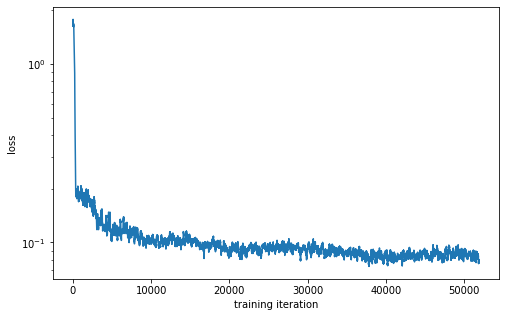

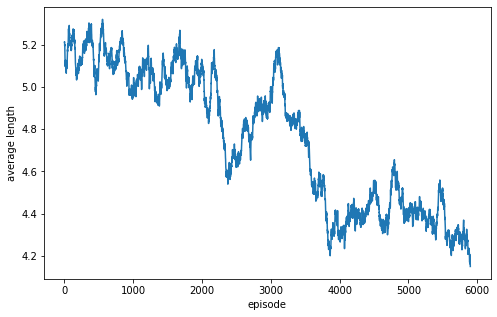

In [21]:
def _moving_avg(x, N=10):
    return np.convolve(np.array(x), np.ones((N,))/N, mode='valid')

plt.figure(figsize=(8,5))
plt.semilogy(_moving_avg(losses, 100))
plt.ylabel('loss')
plt.xlabel('training iteration')

plt.figure(figsize=(8,5))
plt.plot(_moving_avg(path_lengths, 100))
plt.ylabel('average length')
plt.xlabel('episode')


# See Performance of Optimized Model

In [15]:
""" Get file with smallest distance
"""
all_lengths_fnames = [f for f in os.listdir(FOLDER_NAME) if f.endswith('.tar')]
shortest_fname = sorted(all_lengths_fnames, key=lambda s: float(s.split('.tar')[0].split('_')[-1]))[0]
print('shortest avg length found: {}'.format(shortest_fname.split('.tar')[0].split('_')[-1]))

""" Load checkpoint
"""
Q_func, Q_net, optimizer, lr_scheduler = trainer.init_model(os.path.join(FOLDER_NAME, shortest_fname))



shortest avg length found: 4.835689872503281


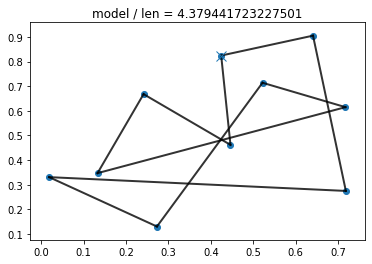

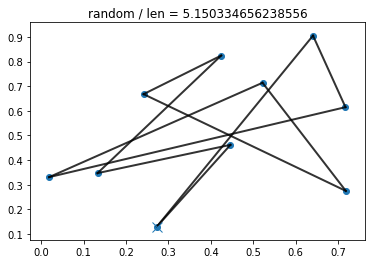

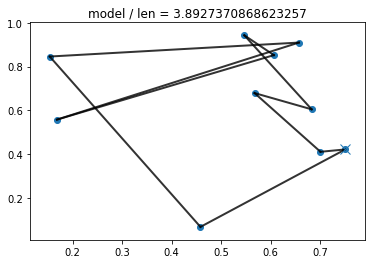

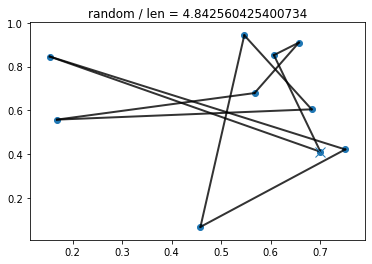

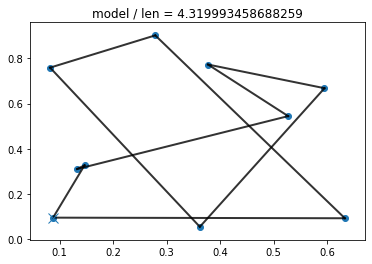

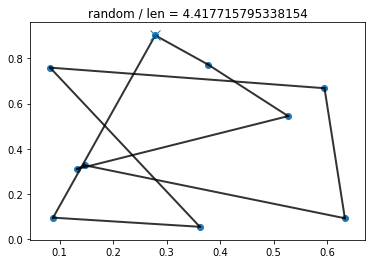

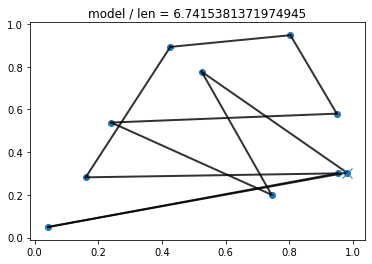

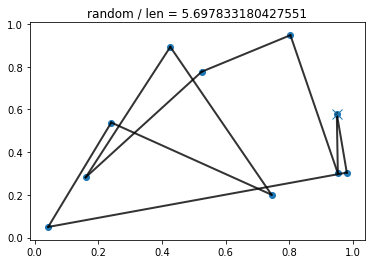

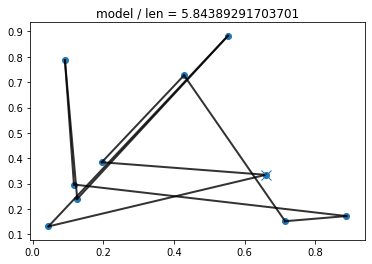

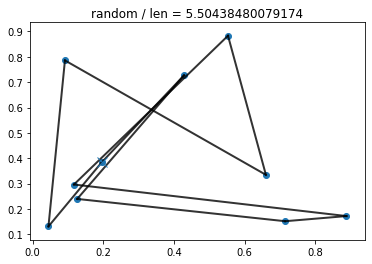

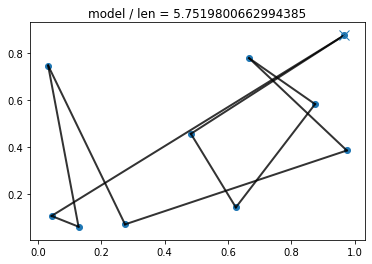

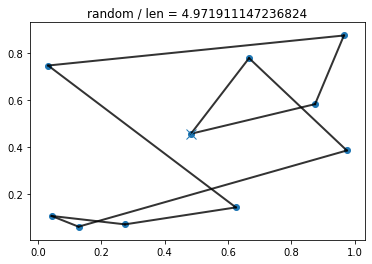

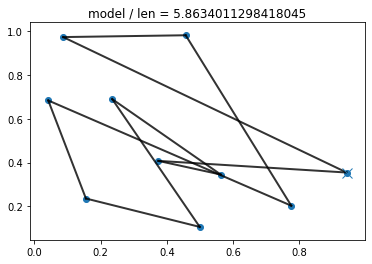

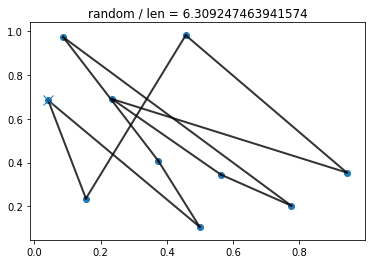

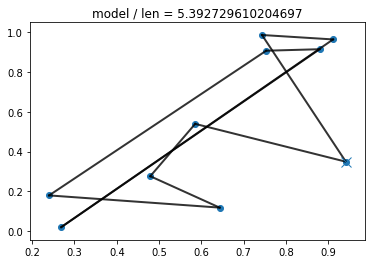

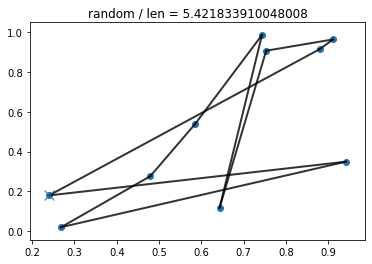

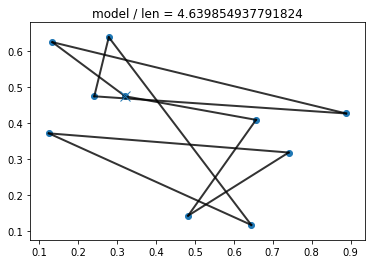

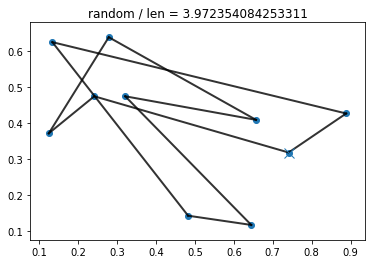

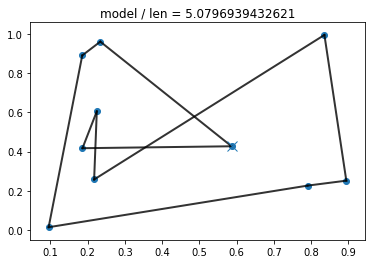

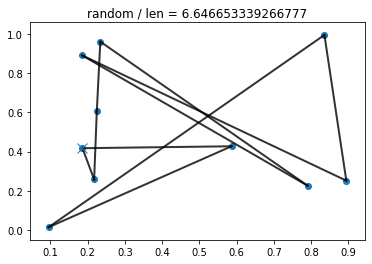

In [16]:
""" Generate example solutions
"""
NR_NODES = 10
for sample in range(10):
    coords, W_np = get_graph_mat(n=NR_NODES)
    W = torch.tensor(W_np, dtype=torch.float32, requires_grad=False, device=device)
    
    solution = [random.randint(0, NR_NODES-1)]
    current_state = State(partial_solution=solution, W=W, coords=coords)
    current_state_tsr = state2tens(current_state)
    
    while not is_state_final(current_state):
        next_node, est_reward = Q_func.get_best_action(current_state_tsr, 
                                                       current_state)
        
        
        solution = solution + [next_node]
        current_state = State(partial_solution=solution, W=W, coords=coords)
        current_state_tsr = state2tens(current_state)
        
    plt.figure()
    plot_solution(coords, W, solution)
    plt.title('model / len = {}'.format(total_distance(solution, W)))
    
    # for comparison, plot a random solution
    plt.figure()
    random_solution = list(range(NR_NODES))
    plot_solution(coords, W, random_solution)
    plt.title('random / len = {}'.format(total_distance(random_solution, W)))
    